In [1]:
import numpy as np
import pandas as pd
import random
from lets_plot import *
from lets_plot.mapping import as_discrete
from IPython.display import display, Markdown


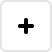
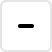
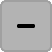
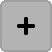
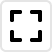
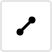
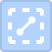
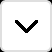
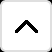
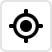
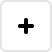
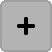
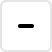
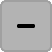
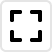
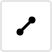
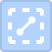
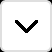
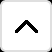
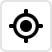

In [2]:
def dump_plot(plot, display=None):
    import json

    try:
        import clipboard
    except:
        clipboard = None
        
    from lets_plot._type_utils import standardize_dict
    
    plot_dict = standardize_dict(plot.as_dict())
    plot_json = json.dumps(plot_dict, indent=2)
    
    if clipboard:
        clipboard.copy('')
        clipboard.copy(str(plot_json))
    else:
        if display is None:
            display = True
    
    if display:
        print(plot_json)

    return plot

LetsPlot.setup_html()

In [3]:
def run_catching(f):
    def colored(s):
        return Markdown('<span style="color: #FF0000">{}</span>'.format(s))
    try:
        plot = f()
        return plot
    except Exception as e:
            display(colored('{}'.format(e)))
            return None

### `Aes.X` and `Aes.Y` discrete

In [4]:
n = 100
np.random.seed(42)
data = {
    'code': np.random.choice(list('abcde'), size=100),
    'value': np.random.normal(size=100),
    'value_str': np.random.choice(list('fghjk'), size=100),
}

In [5]:
gggrid([
    ggplot(data, aes('code', 'value_str')) + geom_bar(),
    ggplot(data, aes('code', 'value_str')) + geom_bar(orientation='y'),
    ggplot(data, aes('code', 'value_str')) + geom_bar(orientation='x')
])

### `Aes.X` - discrete, `Aes.Y` - continues

In [36]:
np.random.seed(42)
data = {
    'code': np.random.choice(list('abcde'), size=4),
    'value': np.random.normal(size=4)
}

In [37]:
gggrid([
    ggplot(data, aes('code', 'value')) + geom_bar(),
    ggplot(data, aes('code', 'value')) + geom_bar(orientation='y'),
    ggplot(data, aes('code', 'value')) + geom_bar(orientation='x')
])

In [8]:
run_catching(lambda: ggplot(data, aes(x='code', y='value')) + geom_boxplot())

In [9]:
run_catching(lambda: ggplot(data, aes(x='code', y='value')) + geom_boxplot(orientation="y"))

In [10]:
run_catching(lambda: ggplot(data, aes(x='code', y='value')) + geom_boxplot(orientation="x"))

### `Aes.X` - continues, `Aes.Y` - discrete

In [38]:
gggrid([
    ggplot(data, aes('value', 'code')) + geom_bar(),
    ggplot(data, aes('value', 'code')) + geom_bar(orientation='y'),
    ggplot(data, aes('value', 'code')) + geom_bar(orientation='x')
])

### `Aes.X` and `Aes.Y` continues

In [23]:
n = 100
np.random.seed(42)
data = {
    'value1': np.random.normal(size=100),
    'value2': 10*np.random.normal(size=100)
}

In [24]:
gggrid([
    ggplot(data, aes('value1', 'value2')) + geom_lollipop(),
    ggplot(data, aes('value1', 'value2')) + geom_lollipop(orientation='y'),
    ggplot(data, aes('value1', 'value2')) + geom_lollipop(orientation='x')
])